In [43]:
# Loading the data
import pandas as pd
kasaa1 = pd.read_csv(r"C:\Users\pc\Desktop\Timeseries\kasaa monthly totals.csv")
kasa2 = pd.DataFrame(kasaa1)
print(kasa2.head())

       Date  Records
0  1/1/2018       26
1  1/2/2018       28
2  1/3/2018       25
3  1/4/2018       40
4  1/5/2018       28


In [5]:
# change the date format in a monthly frequency, and setting the colum date to month
date = pd.date_range(start='1/1/2018', end='12/12/2022', freq='MS')
kasa2 = kasa2.assign(month=date).drop('Date', axis=1).set_index('month')
print(kasa2.head())

            Records
month              
2018-01-01       26
2018-02-01       28
2018-03-01       25
2018-04-01       40
2018-05-01       28


In [6]:
#checking the no. of null values
print(kasa2.isna().sum())

Records    0
dtype: int64


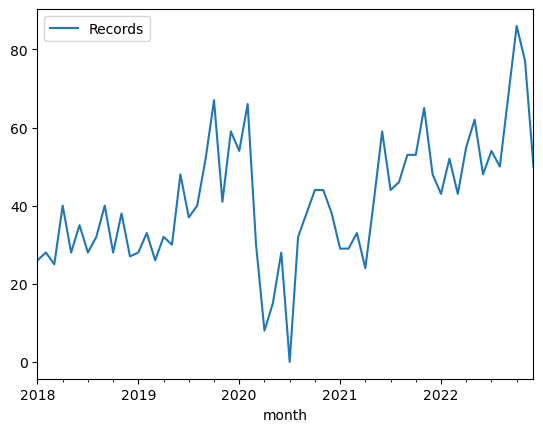

In [9]:
#Raw plotting
import matplotlib.pyplot as plt
kasa2.plot()
plt.savefig("Raw data.png")
plt.show()


In [10]:
#Performing a descriptive statistics
print(kasa2.describe())

         Records
count  60.000000
mean   41.283333
std    15.986320
min     0.000000
25%    29.000000
50%    40.000000
75%    52.000000
max    86.000000


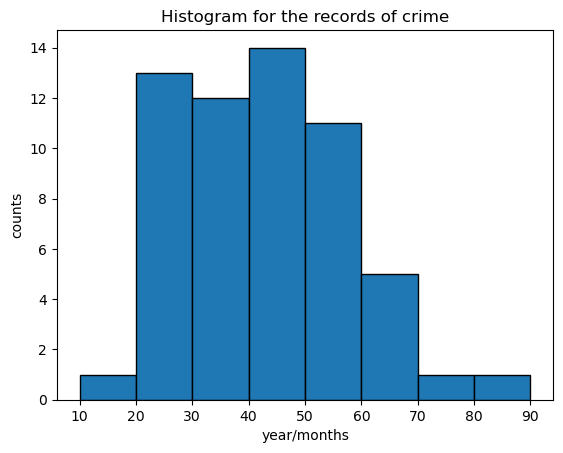

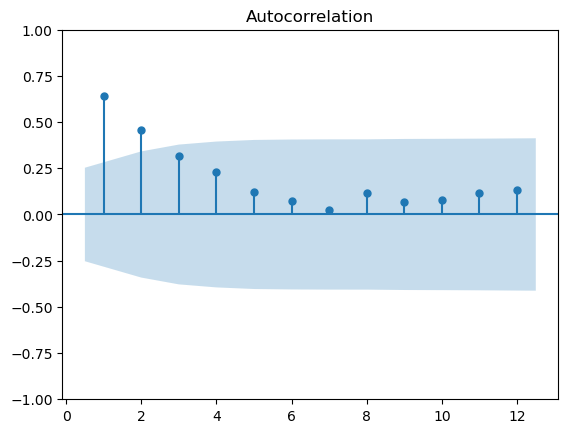

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
#Plotting a histogram of the distribution.
bins = [10,20,30,40,50,60,70,80,90]
plt.hist(kasa2.Records, bins=bins, edgecolor='black')
plt.title('Histogram for the records of crime')
plt.xlabel('year/months')
plt.ylabel("counts")
plt.savefig("Raw histogram.png")
plot_acf(kasa2.Records, lags=12, zero=False)
plt.show()

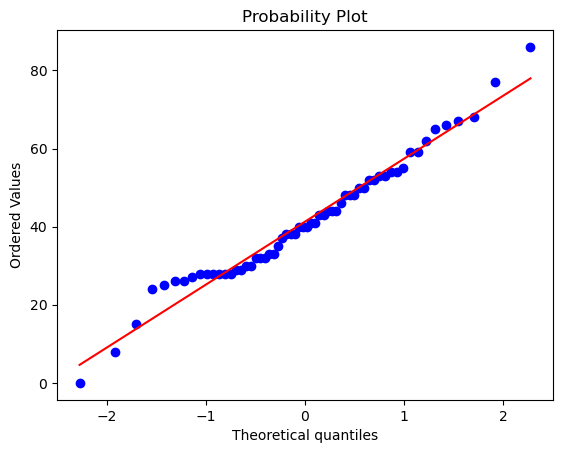

In [14]:
import scipy
import pylab
#QQ plot
#To determine the distribution of the sample. The points should follow a normal distribution.
#Or a y=x
fit = scipy.stats.probplot(kasa2.Records, plot=pylab) 
plt.savefig("rawqq.png")
pylab.show()

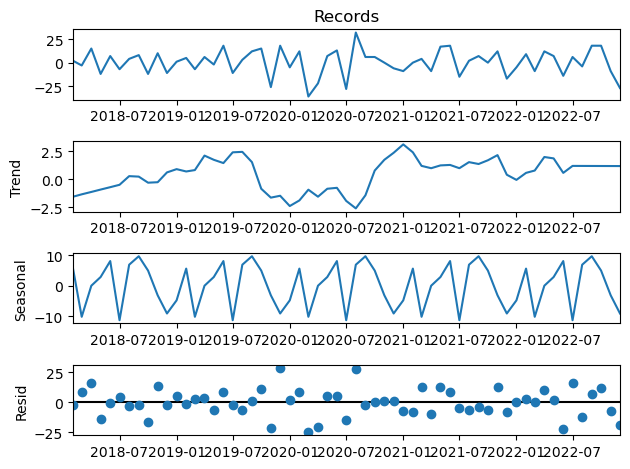

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
#Extract time series data by first differencing.
ts_data = kasa2['Records']
ts_data_diff = ts_data.diff().dropna()
diff2 = seasonal_decompose(ts_data_diff, model='additive', extrapolate_trend='freq')
diff2.plot()
plt.savefig("diff2.png")
plt.show()

In [52]:
from statsmodels.tsa.stattools import adfuller
#ADF test
#Signifies the data is stationery as p-value < 0.05
result = adfuller(kasa2['Records'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
        print(f'   {key}: {value}')

ADF Statistic: -3.546552929508487
p-value: 0.006868978424718734
Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665


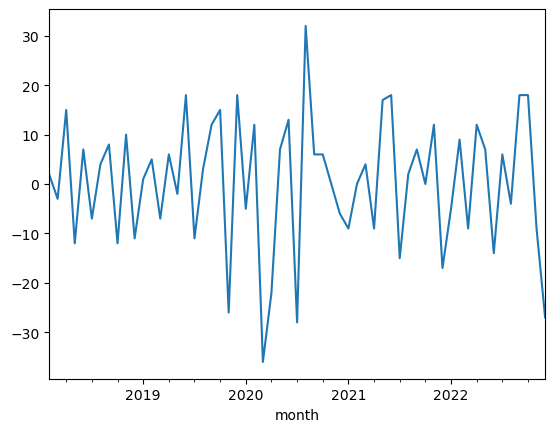

In [58]:
ts_data_diff.plot()
plt.savefig("diff1.png")
plt.show()

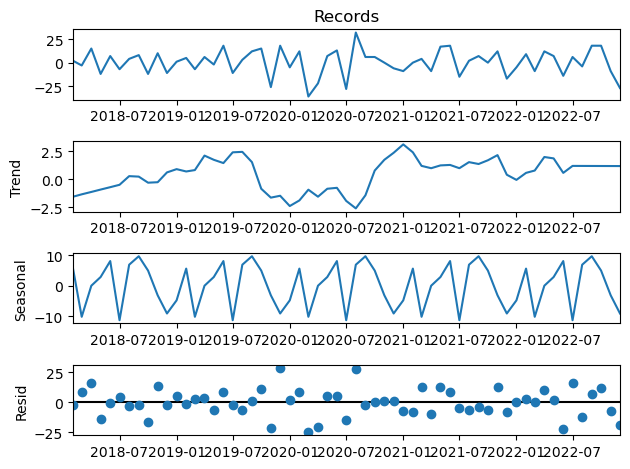

In [17]:
add_decompose = seasonal_decompose(
ts_data_diff, 
model='additive', 
extrapolate_trend='freq'
 )
add_decompose.plot()
plt.savefig("trends.png")
plt.show()


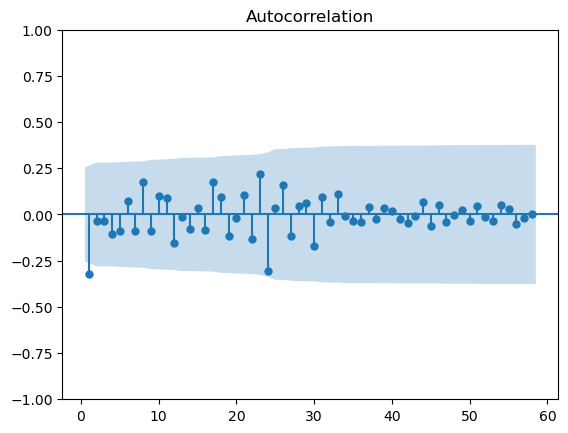

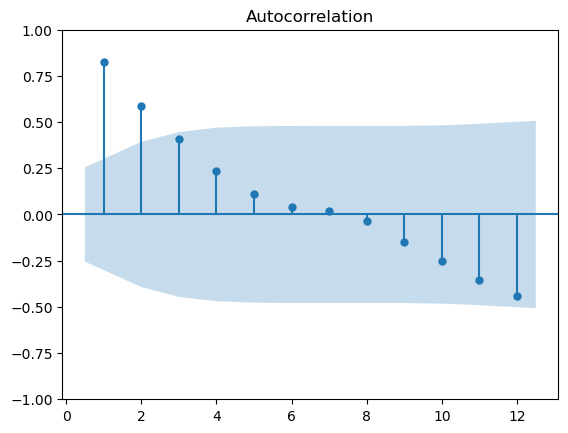

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
residuals = add_decompose.resid
trend = add_decompose.trend
plot_acf(residuals, lags=58, zero=False)
plot_acf(trend, lags=12, zero=False)
plt.savefig("resid.png")
plt.show()

fit = scipy.stats.probplot(ts_data_diff, plot=pylab) 
plt.savefig("qqdiff.png")
pylab.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
#ADF test
#Signifies the data is stationery as p-value < 0.05
result = adfuller(ts_data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
        print(f'   {key}: {value}')

ADF Statistic: -6.799428071189133
p-value: 2.2568585308344175e-09
Critical Values:
   1%: -3.5506699942762414
   5%: -2.913766394626147
   10%: -2.5946240473991997


In [26]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
best_aic = float('inf')
best_order = None
best_model = None

for p in range(5):
    for d in range(3):
        for q in range(5):
            try:
                model = ARIMA(ts_data_diff, order=(p, d, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except:
                continue

print(f'Best ARIMA{best_order} AIC: {best_aic}')

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best ARIMA(1, 0, 1) AIC: 467.41967930585815


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
#Best ARIMA(1, 0, 1) AIC: 467.41967930585815abs

In [28]:
coefficients = model_fit.params
print(coefficients)


ar.L1      -2.095402
ar.L2      -1.607431
ar.L3      -0.590062
ar.L4      -0.140440
ma.L1      -0.113256
ma.L2      -1.757702
ma.L3      -0.099709
ma.L4       0.990471
sigma2    150.474038
dtype: float64


In [54]:
# Fit ARIMA model
model = ARIMA(ts_data_diff)
fitted_model = model.fit()
print(fitted_model.summary())


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Records   No. Observations:                   59
Model:                          ARIMA   Log Likelihood                -236.642
Date:                Fri, 10 May 2024   AIC                            477.285
Time:                        15:05:56   BIC                            481.440
Sample:                    02-01-2018   HQIC                           478.907
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4068      1.830      0.222      0.824      -3.180       3.993
sigma2       178.3887     33.845      5.271      0.000     112.053     244.724
Ljung-Box (L1) (Q):                   4.56   Jarque-

In [55]:
import numpy as np
# Invert differencing to get back to the original scale
forecasted_values = model_fit.forecast(steps=5)
forecasted_values = np.cumsum(forecasted_values)  # Cumulative sum to invert differencing
print(forecasted_values)

2023-01-01    12.177772
2023-02-01    13.908577
2023-03-01    14.850516
2023-04-01    13.916381
2023-05-01    19.111195
Freq: MS, Name: predicted_mean, dtype: float64


In [36]:
# Forecast future time periods
forecast_steps = 10  # Change this according to the number of steps you want to forecast
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

2023-01-01    12.177772
2023-02-01     1.730805
2023-03-01     0.941939
2023-04-01    -0.934135
2023-05-01     5.194814
2023-06-01    -2.431942
2023-07-01     5.182643
2023-08-01    -1.598927
2023-09-01     4.278317
2023-10-01    -0.290395
Freq: MS, Name: predicted_mean, dtype: float64


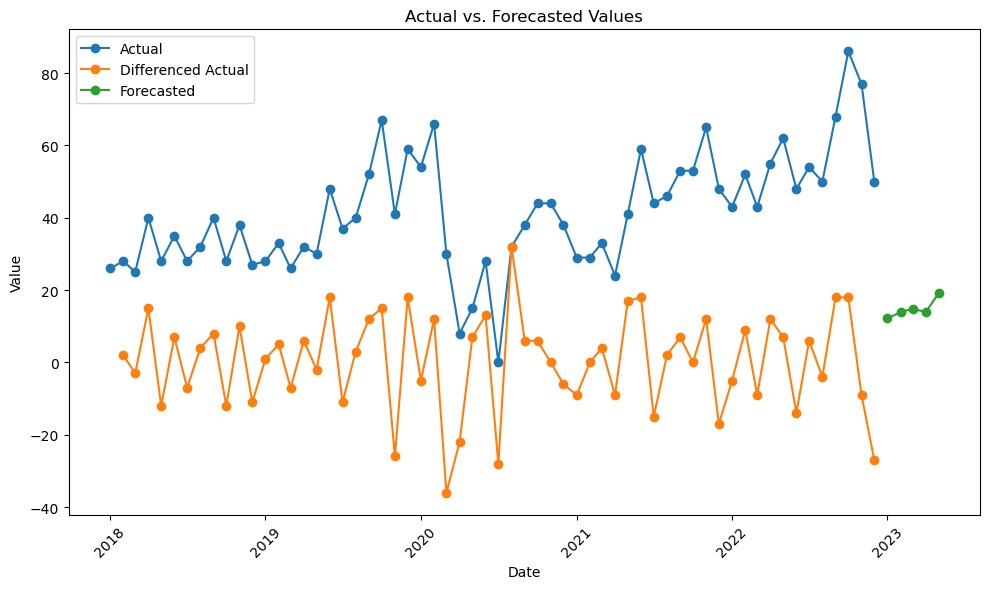

In [60]:
from matplotlib import pyplot as plt
# # Plotting
plt.figure(figsize=(10, 6))
plt.plot(ts_data.index, ts_data.values, label='Actual', marker='o')
plt.plot(ts_data_diff.index, ts_data_diff.values, label='Differenced Actual', marker='o')
plt.plot(forecasted_values.index, forecasted_values, label='Forecasted', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Forecasted Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("All_in_one.png")
plt.show()

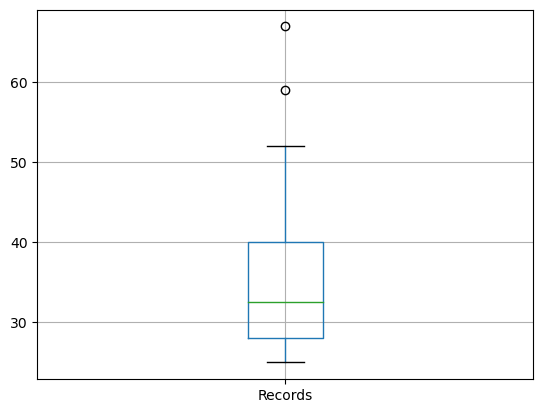

Total sum of values for the time before covid-19: 868


In [39]:
Before_covid = kasa2['2018-01-01':'2019-12-12']
sum_total = Before_covid['Records'].sum()

Before_covid.boxplot(column='Records')
plt.savefig("Beforecovid.png")
plt.show()
print("Total sum of values for the time before covid-19:",  sum_total)

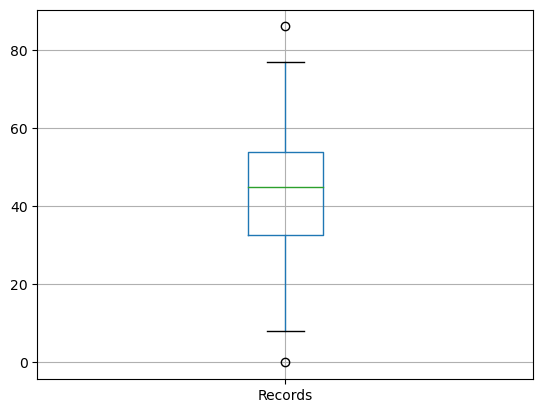

Total sum of values for the time after covid-19: 1609
The boxplots help assess the differences between before and after the pandemic. It's quite noticeable that the after group had a higher median value and IQR than the before group.


In [42]:

After_covid = kasa2['2020-01-01':'2022-12-12']
sum_total2= After_covid['Records'].sum()

After_covid.boxplot(column='Records')
plt.savefig("aftercovid.png")
plt.show()

print("Total sum of values for the time after covid-19:",  sum_total2)

print("The boxplots help assess the differences between before and after the pandemic. It's quite noticeable that the after group had a higher median value and IQR than the before group.")